In [84]:
# Starters
import pandas as pd
from pathlib import Path
import csv
import os
import matplotlib.pyplot as plt
import hvplot.pandas
import datetime as dt
import pandas as pd
import numpy as np
import requests
import json
from scipy.stats import linregress

In [85]:
# Spending File Pathing
health_spending_csv = Path("Resources/Health Care Expenditures per Capita by State of Residence raw data.csv")

#pd.read
spending_data = pd.read_csv(health_spending_csv,skiprows=[0,1])
spending_data = spending_data.dropna(axis=0,how='any',subset=["Health Spending per Capita"])
spending_data["Health Spending per Capita"] = spending_data["Health Spending per Capita"].str.replace(',', '').str.replace('$', '').astype(int)
spending_data["Health Spending per Capita"] = spending_data["Health Spending per Capita"].astype(float)
spending_data.head()

,Location,Health Spending per Capita
0,United States,9671.0
1,Alabama,8741.0
2,Alaska,13226.0
3,Arizona,8145.0
4,Arkansas,8853.0


In [86]:
# Coverage File Pathing
health_coverage_csv = Path("Resources/Health Insurance Coverage of the Total Population raw data #.csv")

#pd.read
coverage_data = pd.read_csv(health_coverage_csv,skiprows=[0,1])
coverage_data = coverage_data.dropna(axis=0,how='any',subset=["Employer"])

# Changing all numeric colomns type from str to Float 
coverage_data["Employer"] = coverage_data["Employer"].astype(float)
coverage_data["Non-Group"] = coverage_data["Non-Group"].astype(float)
coverage_data["Medicaid"] = coverage_data["Medicaid"].astype(float)
coverage_data["Medicare"] = coverage_data["Medicare"].astype(float)
coverage_data["Military"] = coverage_data["Military"].astype(float)
coverage_data["Uninsured"] = coverage_data["Uninsured"].astype(float)
coverage_data["Total"] = coverage_data["Total"].astype(float)

# Changing Total & Uninsured colomn type from str to Float & do subtraction to save it to Insured column
coverage_data['Insured'] = coverage_data['Total'].astype("float") - coverage_data['Uninsured'].astype("float")

#drop Footnotes column
coverage_data = coverage_data.drop(['Footnotes'], axis=1)

coverage_data.head()

,Location,Employer,Non-Group,Medicaid,Medicare,Military,Uninsured,Total,Insured
0,United States,158000000.0,18728800.0,63145700.0,45286700.0,4393600.0,29349300.0,319000000.0,289650700.0
1,Alabama,2250900.0,263400.0,929500.0,763800.0,99000.0,460400.0,4767100.0,4306700.0
2,Alaska,339800.0,24700.0,149400.0,70200.0,37100.0,80500.0,701700.0,621200.0
3,Arizona,3202000.0,366500.0,1489600.0,1145300.0,105600.0,789100.0,7098000.0,6308900.0
4,Arkansas,1226300.0,157300.0,767000.0,464200.0,41800.0,265800.0,2922500.0,2656700.0


In [87]:
#percentages of data
health_coverage_p_csv = Path("Resources/Health Insurance Coverage of the Total Population raw data %.csv")

#pd.read
coverage_data_p = pd.read_csv(health_coverage_p_csv,skiprows=[0,1])
coverage_data_p = coverage_data_p.dropna(axis=0,how='any',subset=["Employer"])
coverage_data_p = coverage_data_p.rename(columns={"Employer":"Employer %"})
coverage_data_p["Employer %"] = coverage_data_p["Employer %"] * 100
coverage_data_p = coverage_data_p.rename(columns={"Non-Group":"Non-Group %"})
coverage_data_p["Non-Group %"] = coverage_data_p["Non-Group %"] * 100
coverage_data_p = coverage_data_p.rename(columns={"Medicaid":"Medicaid %"})
coverage_data_p["Medicaid %"] = coverage_data_p["Medicaid %"] * 100
coverage_data_p = coverage_data_p.rename(columns={"Medicare":"Medicare %"})
coverage_data_p["Medicare %"] = coverage_data_p["Medicare %"] * 100
coverage_data_p = coverage_data_p.rename(columns={"Military":"Military %"})
coverage_data_p["Military %"] = coverage_data_p["Military %"] * 100
coverage_data_p = coverage_data_p.rename(columns={"Uninsured":"Uninsured %"})
coverage_data_p["Uninsured %"] = coverage_data_p["Uninsured %"] * 100
coverage_data_p = coverage_data_p.rename(columns={"Total":"Total %"})
coverage_data_p["Total %"] = coverage_data_p["Total %"] * 100

# Changing all numeric colomns type from str to Float 
coverage_data_p["Employer %"] = coverage_data_p["Employer %"].astype(float)
coverage_data_p["Non-Group %"] = coverage_data_p["Non-Group %"].astype(float)
coverage_data_p["Medicaid %"] = coverage_data_p["Medicaid %"].astype(float)
coverage_data_p["Medicare %"] = coverage_data_p["Medicare %"].astype(float)
coverage_data_p["Military %"] = coverage_data_p["Military %"].astype(float)
coverage_data_p["Uninsured %"] = coverage_data_p["Uninsured %"].astype(float)
coverage_data_p["Total %"] = coverage_data_p["Total %"].astype(float)

# Changing Total & Uninsured colomn type from str to Float & do subtraction to save it to Insured column
coverage_data_p['Insured %'] = coverage_data_p['Total %'].astype("float") - coverage_data_p['Uninsured %'].astype("float")

#drop Footnotes column
coverage_data_p = coverage_data_p.drop(['Footnotes'], axis=1)

coverage_data_p.head()

,Location,Employer %,Non-Group %,Medicaid %,Medicare %,Military %,Uninsured %,Total %,Insured %
0,United States,49.6,5.9,19.8,14.2,1.4,9.2,100.0,90.8
1,Alabama,47.2,5.5,19.5,16.0,2.1,9.7,100.0,90.3
2,Alaska,48.4,3.5,21.3,10.0,5.3,11.5,100.0,88.5
3,Arizona,45.1,5.2,21.0,16.1,1.5,11.1,100.0,88.9
4,Arkansas,42.0,5.4,26.2,15.9,1.4,9.1,100.0,90.9


In [88]:
# Merging
merged_per_state = pd.merge( spending_data, coverage_data, how="left", on=["Location", "Location"] )
merged_per_state.head()

,Location,Health Spending per Capita,Employer,Non-Group,Medicaid,Medicare,Military,Uninsured,Total,Insured
0,United States,9671.0,158000000.0,18728800.0,63145700.0,45286700.0,4393600.0,29349300.0,319000000.0,289650700.0
1,Alabama,8741.0,2250900.0,263400.0,929500.0,763800.0,99000.0,460400.0,4767100.0,4306700.0
2,Alaska,13226.0,339800.0,24700.0,149400.0,70200.0,37100.0,80500.0,701700.0,621200.0
3,Arizona,8145.0,3202000.0,366500.0,1489600.0,1145300.0,105600.0,789100.0,7098000.0,6308900.0
4,Arkansas,8853.0,1226300.0,157300.0,767000.0,464200.0,41800.0,265800.0,2922500.0,2656700.0


In [89]:
# Merging in %
merged_per_state_p = pd.merge( spending_data, coverage_data_p, how="left", on=["Location", "Location"] )
merged_per_state_p.head()

,Location,Health Spending per Capita,Employer %,Non-Group %,Medicaid %,Medicare %,Military %,Uninsured %,Total %,Insured %
0,United States,9671.0,49.6,5.9,19.8,14.2,1.4,9.2,100.0,90.8
1,Alabama,8741.0,47.2,5.5,19.5,16.0,2.1,9.7,100.0,90.3
2,Alaska,13226.0,48.4,3.5,21.3,10.0,5.3,11.5,100.0,88.5
3,Arizona,8145.0,45.1,5.2,21.0,16.1,1.5,11.1,100.0,88.9
4,Arkansas,8853.0,42.0,5.4,26.2,15.9,1.4,9.1,100.0,90.9


In [90]:
#Mortality File Pathing
hd_mortality_csv = Path("Resources/Heart Disease Mortality by State data table.csv")

#pd.read
mortality_data = pd.read_csv(hd_mortality_csv)
mortality_data = mortality_data.loc[(mortality_data["YEAR"] == 2019)]
mortality_data = mortality_data.reset_index(drop=True)
XX_to_full = {"AL":"Alabama",
              "AK":"Alaska",
              "AZ":"Arizona",
              "AR":"Arkansas",
              "CA":"California",
              "CO":"Colorado",
              "CT":"Connecticut",
              "DE":"Delaware",
              "DC":"District of Columbia",
              "FL":"Florida",
              "GA":"Georgia",
              "HI":"Hawaii",
              "ID":"Idaho",
              "IL":"Illinois",
              "IN":"Indiana",
              "IA":"Iowa",
              "KS":"Kansas",
              "KY":"Kentucky",
              "LA":"Louisiana",
              "ME":"Maine",
              "MD":"Maryland",
              "MA":"Massachusetts",
              "MI":"Michigan",
              "MN":"Minnesota",
              "MS":"Mississippi",
              "MO":"Missouri",
              "MT":"Montana",
              "NE":"Nebraska",
              "NV":"Nevada",
              "NH":"New Hampshire",
              "NJ":"New Jersey",
              "NM":"New Mexico",
              "NY":"New York",
              "NC":"North Carolina",
              "ND":"North Dakota",
              "MP":"Northern Mariana Islands",
              "OH":"Ohio",
              "OK":"Oklahoma",
              "OR":"Oregon",
              "PA":"Pennsylvania",
              "PR":"Puerto Rico",
              "RI":"Rhode Island",
              "SC":"South Carolina",
              "SD":"South Dakota",
              "TN":"Tennessee",
              "TX":"Texas",
              "UT":"Utah",
              "VT":"Vermont",
              "VA":"Virginia",
              "VI":"Virgin Islands",
              "WA":"Washington",
              "WV":"West Virginia",
              "WI":"Wisconsin",
              "WY":"Wyoming"}
mortality_data["STATE"]=mortality_data["STATE"].replace(XX_to_full)
mortality_data = mortality_data.rename(columns={"STATE":"Location"})
mortality_data = mortality_data.rename(columns={"YEAR":"Year"})
mortality_data = mortality_data.rename(columns={"RATE":"Deaths per 100k"})
mortality_data = mortality_data.rename(columns={"DEATHS":"Mortality"})
mortality_data["Mortality"] = mortality_data["Mortality"].astype(float)
mortality_data.head()

,Year,Location,Deaths per 100k,Mortality
0,2019,Alabama,219.6,13448.0
1,2019,Alaska,129.7,843.0
2,2019,Arizona,134.0,12587.0
3,2019,Arkansas,226.5,8669.0
4,2019,California,136.9,62394.0


In [91]:
#final Count merge
full_combined =  pd.merge( merged_per_state, mortality_data, how="left", on=["Location", "Location"])
full_combined = full_combined.dropna(axis=0,how='any',subset=["Year"])

full_combined.head()

,Location,Health Spending per Capita,Employer,Non-Group,Medicaid,Medicare,Military,Uninsured,Total,Insured,Year,Deaths per 100k,Mortality
1,Alabama,8741.0,2250900.0,263400.0,929500.0,763800.0,99000.0,460400.0,4767100.0,4306700.0,2019.0,219.6,13448.0
2,Alaska,13226.0,339800.0,24700.0,149400.0,70200.0,37100.0,80500.0,701700.0,621200.0,2019.0,129.7,843.0
3,Arizona,8145.0,3202000.0,366500.0,1489600.0,1145300.0,105600.0,789100.0,7098000.0,6308900.0,2019.0,134.0,12587.0
4,Arkansas,8853.0,1226300.0,157300.0,767000.0,464200.0,41800.0,265800.0,2922500.0,2656700.0,2019.0,226.5,8669.0
5,California,9628.0,18538700.0,2569600.0,9790000.0,4388900.0,350200.0,3005400.0,38642700.0,35637300.0,2019.0,136.9,62394.0


In [92]:
#final % merge
full_combined_p =  pd.merge(merged_per_state_p, mortality_data, how="left", on=["Location", "Location"])
full_combined_p = full_combined_p.dropna(axis=0,how='any',subset=["Year"])

full_combined_p.head()

,Location,Health Spending per Capita,Employer %,Non-Group %,Medicaid %,Medicare %,Military %,Uninsured %,Total %,Insured %,Year,Deaths per 100k,Mortality
1,Alabama,8741.0,47.2,5.5,19.5,16.0,2.1,9.7,100.0,90.3,2019.0,219.6,13448.0
2,Alaska,13226.0,48.4,3.5,21.3,10.0,5.3,11.5,100.0,88.5,2019.0,129.7,843.0
3,Arizona,8145.0,45.1,5.2,21.0,16.1,1.5,11.1,100.0,88.9,2019.0,134.0,12587.0
4,Arkansas,8853.0,42.0,5.4,26.2,15.9,1.4,9.1,100.0,90.9,2019.0,226.5,8669.0
5,California,9628.0,48.0,6.6,25.3,11.4,0.9,7.8,100.0,92.2,2019.0,136.9,62394.0


In [93]:
#national mean grouping

national_avg_spending = full_combined["Health Spending per Capita"].mean()
national_avg_employer = full_combined["Employer"].mean()
national_avg_non_group = full_combined["Non-Group"].mean()
national_avg_medicaid = full_combined["Medicaid"].mean()
national_avg_military = full_combined["Military"].mean()
national_avg_uninsured = full_combined["Uninsured"].mean()
national_avg_total = full_combined["Total"].mean()
national_avg_deaths_per = full_combined["Deaths per 100k"].mean()

national_avg_data = pd.DataFrame({"Average Health Spending per Capita" : [national_avg_spending],
                                 "Average Employer Coverage" : [national_avg_employer],
                                 "Average Non-Group Coverage" : [national_avg_non_group],
                                 "Average Medicaid Coverage" : [national_avg_medicaid],
                                 "Average Military Coverage" : [national_avg_military],
                                 "Average Uninsured" : [national_avg_uninsured],
                                 "Average Total Coverage" : [national_avg_total],
                                 "Average Deaths per 100k" : [national_avg_deaths_per]})
                                  
national_avg_data

,Average Health Spending per Capita,Average Employer Coverage,Average Non-Group Coverage,Average Medicaid Coverage,Average Military Coverage,Average Uninsured,Average Total Coverage,Average Deaths per 100k
0,9860.64,3159540.0,373706.0,1259500.0,87692.0,586498.0,6371556.0,163.688


In [94]:
location_count = len(full_combined["Location"].unique())
location_count

50

In [95]:
#national sum grouping

national_sum_spending = full_combined["Health Spending per Capita"].sum()
national_sum_employer = full_combined["Employer"].sum()
national_sum_non_group = full_combined["Non-Group"].sum()
national_sum_medicaid = full_combined["Medicaid"].sum()
national_sum_military = full_combined["Military"].sum()
national_sum_uninsured = full_combined["Uninsured"].sum()
national_sum_total = full_combined["Total"].sum()
national_sum_deaths = full_combined["Mortality"].sum()

national_sum_data = pd.DataFrame({"Total Health Spending per Capita" : [national_sum_spending],
                                 "Total Employer Coverage" : [national_sum_employer],
                                 "Total Non-Group Coverage" : [national_sum_non_group],
                                 "Total Medicaid Coverage" : [national_sum_medicaid],
                                 "Total Military Coverage" : [national_sum_military],
                                 "Total Uninsured" : [national_sum_uninsured],
                                 "Total Total Coverage" : [national_sum_total],
                                 "Total Mortality" : [national_sum_deaths]})
national_sum_data

,Total Health Spending per Capita,Total Employer Coverage,Total Non-Group Coverage,Total Medicaid Coverage,Total Military Coverage,Total Uninsured,Total Total Coverage,Total Mortality
0,493032.0,157977000.0,18685300.0,62975000.0,4384600.0,29324900.0,318577800.0,657854.0


In [96]:
# Coordinates file pathing
state_coordinates_csv = Path("Resources/us_state_coordinates.csv")

# Read csv
state_coordinates = pd.read_csv(state_coordinates_csv)

# Rename columns
state_coordinates = state_coordinates.rename(columns={"name":"Location"})
state_coordinates.head()

,Location,description,latitude,longitude
0,Alabama,Montgomery,32.377716,-86.300568
1,Alaska,Juneau,58.301598,-134.420212
2,Arizona,Phoenix,33.448143,-112.096962
3,Arkansas,Little Rock,34.746613,-92.288986
4,California,Sacramento,38.576668,-121.493629


In [97]:
# Merging coordinates and mortality_data
coordinates_df = pd.merge(state_coordinates, full_combined, how="left", on="Location")
coordinates_df = coordinates_df.drop(columns={"Year"})
coordinates_df.head()

,Location,description,latitude,longitude,Health Spending per Capita,Employer,Non-Group,Medicaid,Medicare,Military,Uninsured,Total,Insured,Deaths per 100k,Mortality
0,Alabama,Montgomery,32.377716,-86.300568,8741.0,2250900.0,263400.0,929500.0,763800.0,99000.0,460400.0,4767100.0,4306700.0,219.6,13448.0
1,Alaska,Juneau,58.301598,-134.420212,13226.0,339800.0,24700.0,149400.0,70200.0,37100.0,80500.0,701700.0,621200.0,129.7,843.0
2,Arizona,Phoenix,33.448143,-112.096962,8145.0,3202000.0,366500.0,1489600.0,1145300.0,105600.0,789100.0,7098000.0,6308900.0,134.0,12587.0
3,Arkansas,Little Rock,34.746613,-92.288986,8853.0,1226300.0,157300.0,767000.0,464200.0,41800.0,265800.0,2922500.0,2656700.0,226.5,8669.0
4,California,Sacramento,38.576668,-121.493629,9628.0,18538700.0,2569600.0,9790000.0,4388900.0,350200.0,3005400.0,38642700.0,35637300.0,136.9,62394.0


# Research Questions and Analysis

# Research Question 1: Is there a relationship between healthcare spending per capita and heart disease mortality rate at the state level?

### Linear Regression: Health Spending per Capita vs Heart Disease Mortality Rate

The rvalue is: -0.23784232155677046
The r-squared is: 0.0565689699235142
The Slope is: -0.004681417532369848
The Intercept is: 209.84977297638744
The pvalue is: 0.09626753407319355
The Std. Dev. is: 0.0027594510941566087


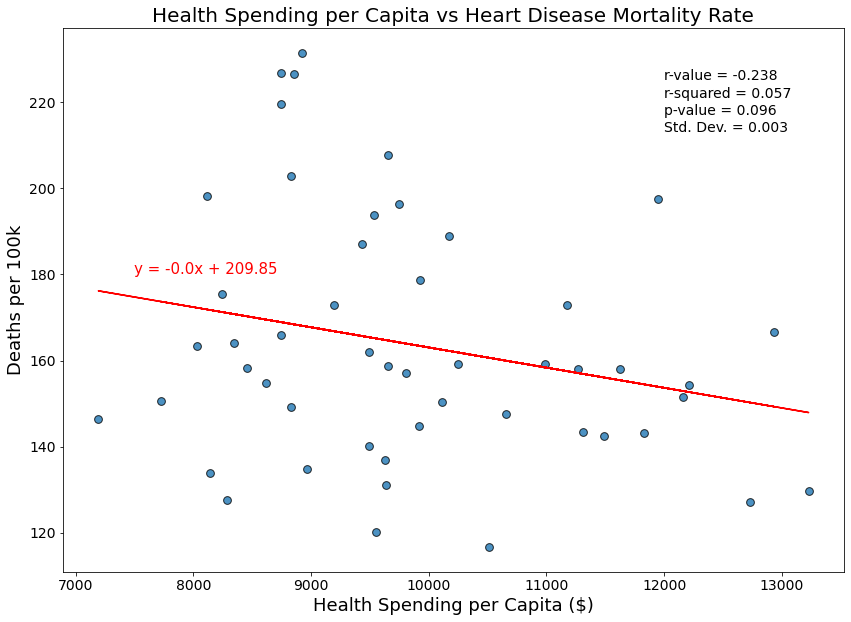

In [98]:
# Linear regression Health Spending per Capita vs Heart Disease Mortality Rate

x_values= full_combined_p["Health Spending per Capita"]
y_values= full_combined_p["Deaths per 100k"]
xlabel='Health Spending per Capita ($)'
ylabel='Deaths per 100k'
title="Health Spending per Capita vs Heart Disease Mortality Rate"
x_ann = 7500
y_ann = 180

plt.figure(figsize=(14,10))
plt.title(title, fontsize=20)
plt.scatter(x_values,y_values,edgecolor="black",alpha=0.80,s=60)
plt.xlabel(xlabel,size=18)
plt.ylabel(ylabel,size=18)
plt.tick_params(axis='both', which='major', labelsize=14)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = f"y = {round(slope,2)}x + {round(intercept,2)}"
plt.annotate(line_eq,(x_ann,y_ann),fontsize=15,color="red")
plt.plot(x_values,regress_values,"r-")
print(f"The rvalue is: {rvalue}")
print(f"The r-squared is: {rvalue**2}")
print(f"The Slope is: {slope}\n"
      f"The Intercept is: {intercept}\n"
      f"The pvalue is: {pvalue}\n"
      f"The Std. Dev. is: {stderr}")

plt.annotate("r-value = {:.3f}".format(rvalue), (12000, 225),fontsize=14,color="black")
plt.annotate("r-squared = {:.3f}".format(rvalue**2), (12000, 221),fontsize=14,color="black")
plt.annotate("p-value = {:.3f}".format(pvalue), (12000, 217),fontsize=14,color="black")
plt.annotate("Std. Dev. = {:.3f}".format(stderr), (12000, 213),fontsize=14,color="black")

plt.savefig("output_fig/LRSpendingVsMortality.png")
plt.show()

# Health Spending per Capita vs Heart Disease Mortality Rate

Overall, there is a weak negative correlation between health spending per capita and mortality rates, the relationship is not particularly strong or statistically significant.

The regression statistics suggest that there is a weak negative correlation between health spending per capita and mortality rates, with an r-value of -0.24. The r-squared value of 0.06 indicates that only 6% of the variation in mortality rates can be explained by the variation in health spending per capita, while the remaining 94% of the variation is likely due to other factors not accounted for in the model.

The p-value of 0.096 suggests that the observed relationship between health spending and mortality rates may not be statistically significant at the traditional alpha level of 0.05. 

# Research Question 2: Is there a relationship between health insurance coverage and heart disease mortality rate at the state level?

### Linear Regression: Insured & Uninsured vs Disease Mortality

#### Linear regression on Uninsured vs Disease Mortality

The rvalue is: 0.30592223916907596
The r-squared is: 0.09358841641822131
The Slope is: 2.862823279231946
The Intercept is: 139.4456124714639
The pvalue is: 0.03072798136796416
The Std. Dev. is: 1.2859544791136859


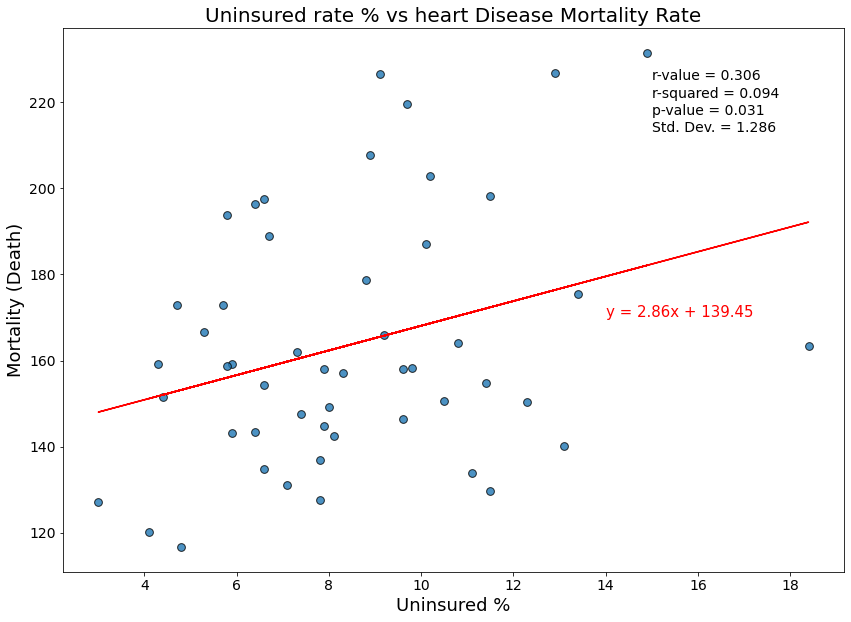

In [99]:
# Linear regression on Uninsured vs Disease Mortality %
# # ploting based on Mortality Death %

x_values= full_combined_p["Uninsured %"]
y_values= full_combined_p["Deaths per 100k"]
xlabel='Uninsured %'
ylabel='Mortality (Death)'
title="Uninsured rate % vs heart Disease Mortality Rate"
x_ann = 14
y_ann = 170

plt.figure(figsize=(14,10))
plt.title(title, fontsize=20)
plt.scatter(x_values,y_values,edgecolor="black",alpha=0.80,s=60)
plt.xlabel(xlabel,size=18)
plt.ylabel(ylabel,size=18)
plt.tick_params(axis='both', which='major', labelsize=14)
    
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = f"y = {round(slope,2)}x + {round(intercept,2)}"
plt.annotate(line_eq,(x_ann,y_ann),fontsize=15,color="red")

plt.plot(x_values,regress_values,"r-")
    
print(f"The rvalue is: {rvalue}")
print(f"The r-squared is: {rvalue**2}")
print(f"The Slope is: {slope}\n"
      f"The Intercept is: {intercept}\n"
      f"The pvalue is: {pvalue}\n"
      f"The Std. Dev. is: {stderr}")

plt.annotate("r-value = {:.3f}".format(rvalue), (15, 225),fontsize=14,color="black")
plt.annotate("r-squared = {:.3f}".format(rvalue**2), (15, 221),fontsize=14,color="black")
plt.annotate("p-value = {:.3f}".format(pvalue), (15, 217),fontsize=14,color="black")
plt.annotate("Std. Dev. = {:.3f}".format(stderr), (15, 213),fontsize=14,color="black")

plt.savefig("output_fig/LRUninsuredVsMortality.png")
plt.show()

# Linear regression on Uninsured vs Disease Mortality based on percentage %
The regression Statistics between Mortality & Uninsured per state has perfect positive correlation with "r-value" 0.31 & r-squared 0.094 means 9.4% of Mortality (Death) has direct proportional relationship with Uninsured citizens.
p-value is 0.031 & the same with Std. Dev represents a positive correlation with scattered Standard Deviations not close to the linear regression line Std. Dev. 1.29 .
And graph is a good proof that the more uninsured citizens the more heart disease mortality but doesn’t have high impact.

#### Linear regression on Insured vs Disease Mortality

The rvalue is: -0.30592223916907646
The r-squared is: 0.09358841641822162
The Slope is: -2.86282327923195
The Intercept is: 425.72794039465884
The pvalue is: 0.030727981367963834
The Std. Dev. is: 1.2859544791136854


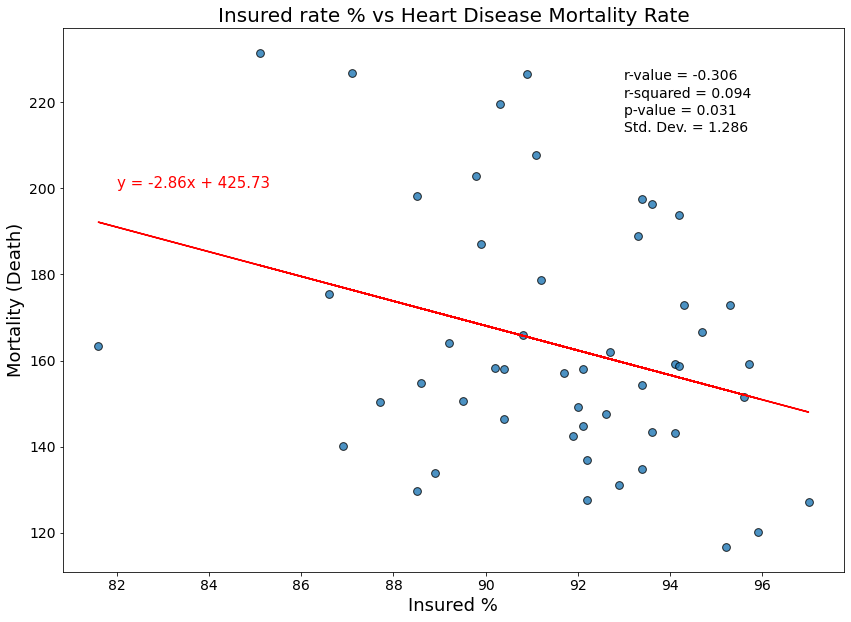

In [100]:
# Linear regression on Insured vs Disease Mortality %
# # ploting based on Mortality Death %

x_values= full_combined_p["Insured %"]
y_values= full_combined_p["Deaths per 100k"]
xlabel='Insured %'
ylabel='Mortality (Death)'
title="Insured rate % vs Heart Disease Mortality Rate"
x_ann = 82
y_ann = 200

plt.figure(figsize=(14,10))
plt.title(title, fontsize=20)
plt.scatter(x_values,y_values,edgecolor="black",alpha=0.80,s=60)
plt.xlabel(xlabel,size=18)
plt.ylabel(ylabel,size=18)
plt.tick_params(axis='both', which='major', labelsize=14)
    
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = f"y = {round(slope,2)}x + {round(intercept,2)}"
plt.annotate(line_eq,(x_ann,y_ann),fontsize=15,color="red")

plt.plot(x_values,regress_values,"r-")
    
print(f"The rvalue is: {rvalue}")
print(f"The r-squared is: {rvalue**2}")
print(f"The Slope is: {slope}\n"
      f"The Intercept is: {intercept}\n"
      f"The pvalue is: {pvalue}\n"
      f"The Std. Dev. is: {stderr}" )

plt.annotate("r-value = {:.3f}".format(rvalue), (93, 225),fontsize=14,color="black")
plt.annotate("r-squared = {:.3f}".format(rvalue**2), (93, 221),fontsize=14,color="black")
plt.annotate("p-value = {:.3f}".format(pvalue), (93, 217),fontsize=14,color="black")
plt.annotate("Std. Dev. = {:.3f}".format(stderr), (93, 213),fontsize=14,color="black")
   
plt.savefig("output_fig/LRInsuredVsMortality.png")
plt.show()

### Linear regression on Insured vs Disease Mortality based on percentage %
The regression Statistics between Mortality & Insured per state has negative correlation with "r-value" -0.31 & r-squared 0.094 means 9.4% of Mortality (Death) has direct impact relationship from Insured citizens.
"p-value" is 0.031 & the same with Std. Dev is almost 1.29 & that represents a negative correlation with scattered Standard Deviations. 
And graph is a good proof that the more insured citizens the less heart disease mortality.

# Research Question 3: Do states with higher healthcare spending per capita tend to have higher rates of health insurance coverage?

The rvalue is: 0.5177186254194186
The r-squared is: 0.2680325751061723
The Slope is: 0.0010889264343743475
The Intercept is: 80.79448844415091
The pvalue is: 0.00011791214020958657
The Std. Dev. is: 0.0002597347210604668


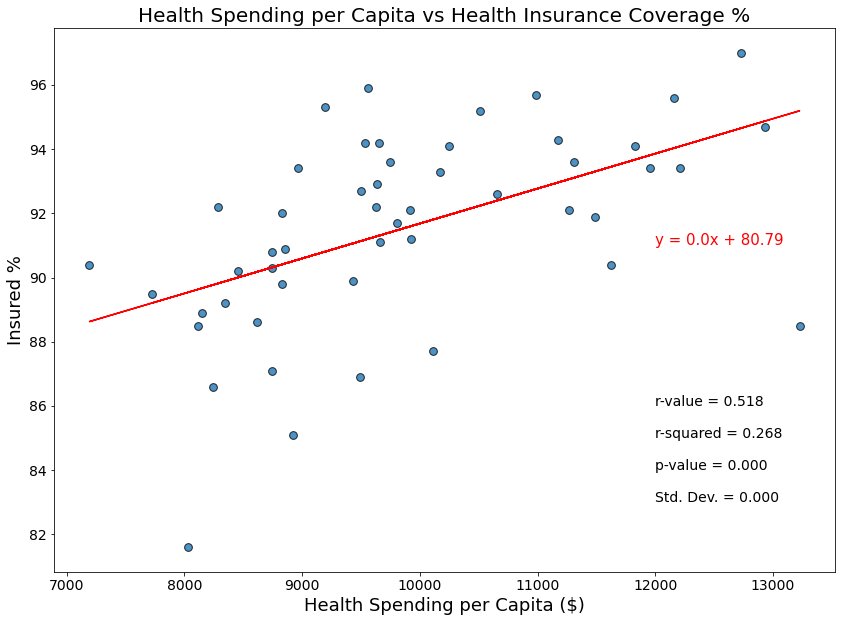

In [101]:
# Linear regression Health Spending per Capita vs Health Insurance Coverage %

x_values= full_combined_p["Health Spending per Capita"]
y_values= full_combined_p["Insured %"]
xlabel='Health Spending per Capita ($)'
ylabel='Insured %'
title="Health Spending per Capita vs Health Insurance Coverage %"
x_ann = 12000
y_ann = 91

plt.figure(figsize=(14,10))
plt.title(title, fontsize=20)
plt.scatter(x_values,y_values,edgecolor="black",alpha=0.80,s=60)
plt.xlabel(xlabel,size=18)
plt.ylabel(ylabel,size=18)
plt.tick_params(axis='both', which='major', labelsize=14)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = f"y = {round(slope,2)}x + {round(intercept,2)}"
plt.annotate(line_eq,(x_ann,y_ann),fontsize=15,color="red")
plt.plot(x_values,regress_values,"r-")
print(f"The rvalue is: {rvalue}")
print(f"The r-squared is: {rvalue**2}")
print(f"The Slope is: {slope}\n"
      f"The Intercept is: {intercept}\n"
      f"The pvalue is: {pvalue}\n"
      f"The Std. Dev. is: {stderr}")

plt.annotate("r-value = {:.3f}".format(rvalue), (12000, 86),fontsize=14,color="black")
plt.annotate("r-squared = {:.3f}".format(rvalue**2), (12000, 85),fontsize=14,color="black")
plt.annotate("p-value = {:.3f}".format(pvalue), (12000, 84),fontsize=14,color="black")
plt.annotate("Std. Dev. = {:.3f}".format(stderr), (12000, 83),fontsize=14,color="black")

plt.savefig("output_fig/CapitaVSHealthCoverage.png")
plt.show()

## Health Spending per Capita vs Health Insurance Coverage %

#### This scatter plot shows the correlation between healthcare spending vs health insurance coverage. Different types of health coverage is identified across all the states in the US during 2019. The types of health coverage includes employer, non-group, Medicaid, Medicare, and Military. States with higher healthcare spending tend to have a greater percentage of insured coverage.

#### The r-value 0.52 identifies moderate correlation. The r-squared value is fairly low and does no explain the variation in the data much. The low p-value is statistically significant and most likely the null hypothesis is rejected. The low standard deviation indicates that the data is close to the mean.

# Research Question 4: Is there a relationship between a state's location and its heart disease mortality rate?

The r-value is: -0.3379106116880979
The r-squared is: 0.11418358149142448
The slope is: -1.6926846174942873
The intercept is: 230.40252658965898
The p-value is: 0.01639418576103126
The Std. Dev. is: 0.6804958188662694


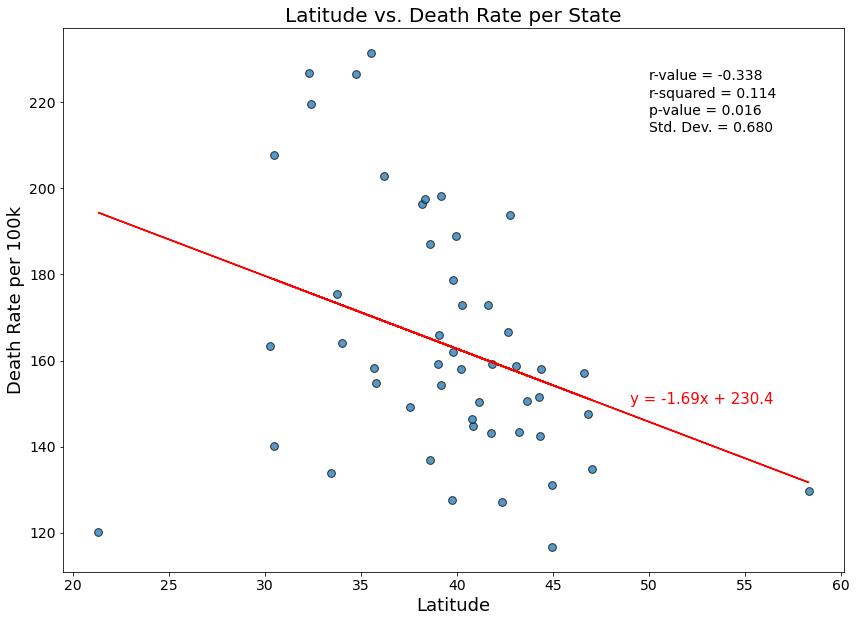

In [102]:
# Scatter plot Latitude vs Deaths per 100k
# # Build scatter plot for Latitude vs Deaths per 100k

x_axis = coordinates_df["latitude"]
y_axis = coordinates_df["Deaths per 100k"]

plt.figure(figsize=(14, 10))
plt.scatter(x_axis, y_axis,edgecolor="black",alpha=0.75,s=60)
plt.xlabel("Latitude",size=18)
plt.ylabel("Death Rate per 100k",size=18)
plt.title("Latitude vs. Death Rate per State",size=20)
plt.tick_params(axis='both', which='major', labelsize=14)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(x_axis, regress_values,"r-")
plt.annotate(line_eq, (49,150),fontsize=15,color="red")

print(f"The r-value is: {rvalue}")
print(f"The r-squared is: {rvalue**2}")
print(f"The slope is: {slope}")
print(f"The intercept is: {intercept}")
print(f"The p-value is: {pvalue}")
print(f"The Std. Dev. is: {stderr}")

plt.annotate("r-value = {:.3f}".format(rvalue), (50, 225),fontsize=14,color="black")
plt.annotate("r-squared = {:.3f}".format(rvalue**2), (50, 221),fontsize=14,color="black")
plt.annotate("p-value = {:.3f}".format(pvalue), (50, 217),fontsize=14,color="black")
plt.annotate("Std. Dev. = {:.3f}".format(stderr), (50, 213),fontsize=14,color="black")
   
plt.savefig("output_fig/lat_vs_rate.png")
plt.show()

The r-value is: 0.26307082551942657
The r-squared is: 0.06920625923947257
The slope is: 0.40422267626481656
The intercept is: 201.46905122607654
The p-value is: 0.06492085871555071
The Std. Dev. is: 0.21397059477015715


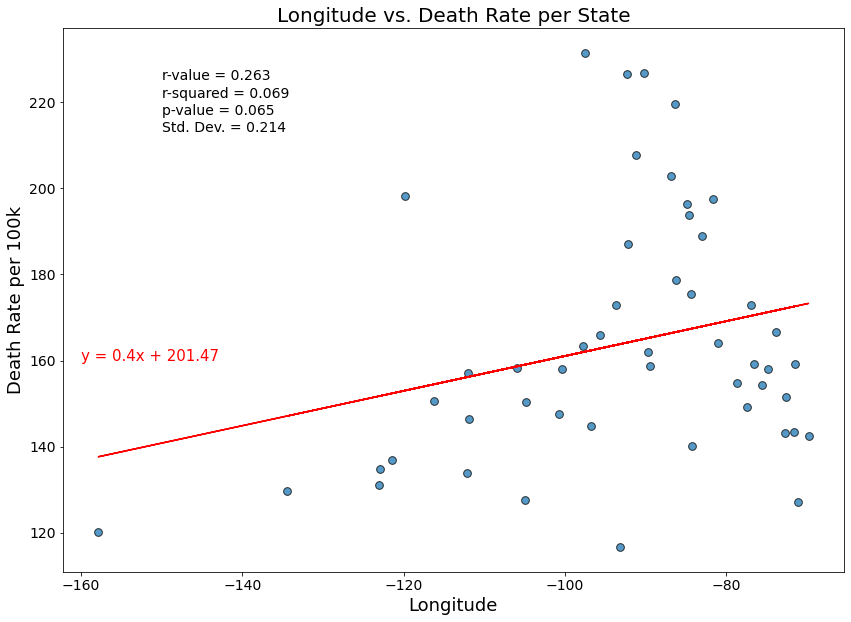

In [103]:
# Scatter Plot Longitude vs. Deaths per 100k
# # Build scatter plot for Latitude vs Deaths per 100k

x_axis = coordinates_df["longitude"]
y_axis = coordinates_df["Deaths per 100k"]

plt.figure(figsize=(14, 10))
plt.scatter(x_axis, y_axis,edgecolor="black",alpha=0.75,s=60)
plt.xlabel("Longitude",size=18)
plt.ylabel("Death Rate per 100k",size=18)
plt.title("Longitude vs. Death Rate per State",size=20)
plt.tick_params(axis='both', which='major', labelsize=14)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(x_axis, regress_values,"r-")
plt.annotate(line_eq, (-160,160),fontsize=15,color="red")

print(f"The r-value is: {rvalue}")
print(f"The r-squared is: {rvalue**2}")
print(f"The slope is: {slope}")
print(f"The intercept is: {intercept}")
print(f"The p-value is: {pvalue}")
print(f"The Std. Dev. is: {stderr}")

plt.annotate("r-value = {:.3f}".format(rvalue), (-150, 225),fontsize=14,color="black")
plt.annotate("r-squared = {:.3f}".format(rvalue**2), (-150, 221),fontsize=14,color="black")
plt.annotate("p-value = {:.3f}".format(pvalue), (-150, 217),fontsize=14,color="black")
plt.annotate("Std. Dev. = {:.3f}".format(stderr), (-150, 213),fontsize=14,color="black")
   
plt.savefig("output_fig/lon_vs_rate.png")
plt.show()

In [104]:
# Create the map plot
mortality_rate_map = coordinates_df.hvplot.points("longitude","latitude",geo=True,tiles="OSM",size="Deaths per 100k",
                                        color="Location",xlabel="Longitude",ylabel="Latitude",alpha=0.6)

# Display the map
mortality_rate_map

:Overlay
   .Tiles.I  :Tiles   [x,y]
   .Points.I :Points   [longitude,latitude]   (Location,Deaths per 100k)

## Analysis:
    
The linear regression for Latitude vs Death Rate per State shows a negative correlation, meaning that as a state's latitude increases, their death rate decreases. The r-value is -0.33 indicating a fairly weak correlation between latitude and death rate per state. The r-squared value is 0.11, indicating that 91% of the variability in the outcome is due to factors not accounted for in the model. The p-value is quite strong at roughly 0.02, indicating very high accuracy of these findings.

The linear regression for Longitude vs Death Rate per State shows a positive correlation, meaning that as a state's longitude increases, so does its death rate. The r-value shows a weak correlation between state longitude and death rate at 0.26. The r-sqared value is roughly 0.07, indicating that 93% of the variability in the outcome is due to factors not accounted for in the model. The p-value is fairly average at 0.06, meaning that these findings are likely accurate.

It is unlikely that the latitude or longitude of a state has much of an impact on the state's heart disease mortality rate, but there is some correlation. Most likely, though, the outcome is the result of other factors not accounted for in our analysis.

# Research Question 5: Which states have the highest and lowest heart disease mortality rates? 

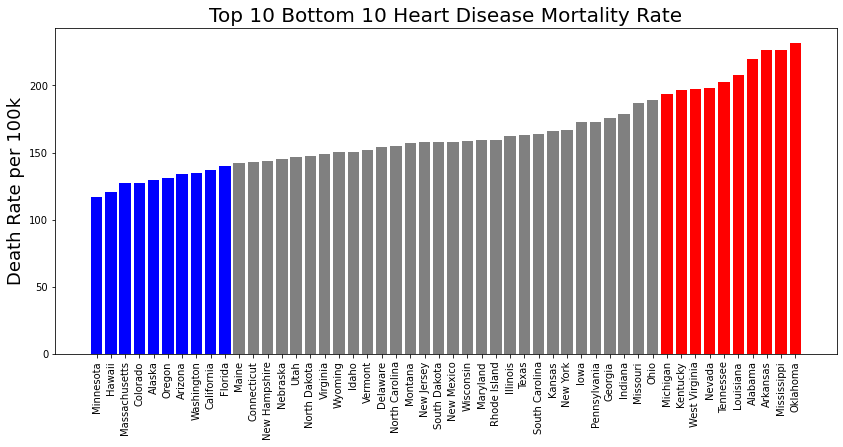

In [105]:
# Sort data frame by "Deaths per 100k" and split into top and bottom 10
full_combined_sorted = full_combined.sort_values(by="Deaths per 100k", ascending=True)
top10 = full_combined_sorted.nlargest(10, "Deaths per 100k")
bottom10 = full_combined_sorted.nsmallest(10, "Deaths per 100k")

# Create a bar plot with top and bottom 10 in different colors
plt.figure(figsize=(14,6))
plt.bar(full_combined_sorted["Location"], full_combined_sorted["Deaths per 100k"], color='grey')
plt.bar(top10["Location"], top10["Deaths per 100k"], color='red')
plt.bar(bottom10["Location"], bottom10["Deaths per 100k"], color='blue')
plt.ylabel("Death Rate per 100k",size=18)
plt.title("Top 10 Bottom 10 Heart Disease Mortality Rate",size=20)
plt.xticks(rotation="vertical")
plt.savefig("output_fig/Top10_Bottom10_DeathRate.png")
plt.show()